In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pickle
from tensorflow import keras as keras
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

import xgboost
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

2023-10-05 23:00:57.697719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [6]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=9216)]
#     )
#   except RuntimeError as e:
#     print(e)

# devices = tf.config.list_physical_devices()
# print("Available devices:\n", devices)

# tf.config.set_visible_devices(gpus[0], "GPU")

# logical_gpus = tf.config.experimental.list_logical_devices("GPU")
# print("Using GPU:", logical_gpus[0].name)

In [7]:
# data = pd.read_csv('./data/train_data_histogram_longtime_subsampled_210000.csv')

# y = data['output']
# X = data.drop(['output'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [23]:
data = pd.read_csv('./data/large/train_data_histogram_longtime_210000_coursegrained.csv')

y = data['output_val']
X = data.drop(['output_val'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)


In [24]:
# data = pd.read_csv('./data/train_data_histogram_longtime_210000.csv')
# print the labels of the columns
print(data.columns)


Index(['U', 'R', 'output_val'], dtype='object')


In [25]:
print("X_test:",X_test.shape)
print("X_train:",X_train.shape)

X_test: (419801, 2)
X_train: (1679200, 2)


In [26]:
model = xgboost.XGBRegressor()

In [27]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
predictions = model.predict(X_test)

In [35]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [36]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.030 (0.001)


NameError: name 'history' is not defined

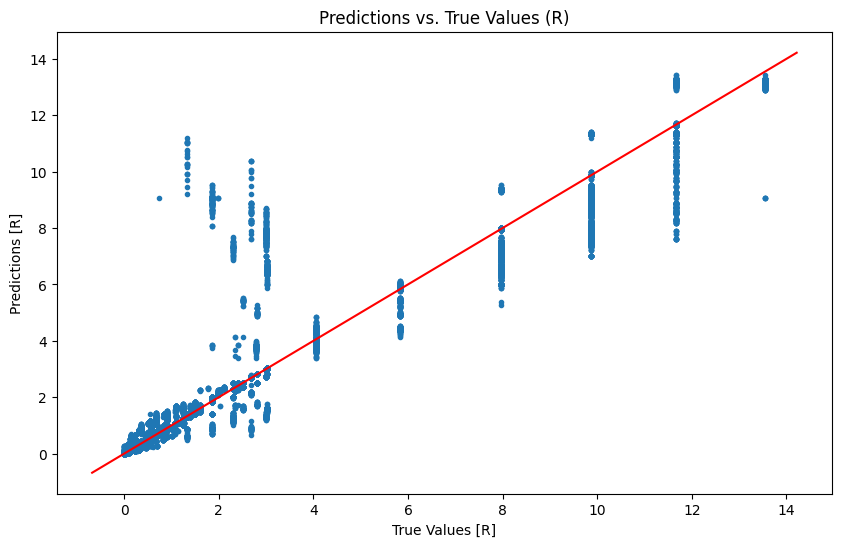

<Figure size 1000x600 with 0 Axes>

In [29]:
# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(pd.DataFrame(y_test).iloc[:,0], predictions, '.')
# plt.plot(y_test_2d, predictions, '.')
plt.xlabel('True Values [R]')
plt.ylabel('Predictions [R]')
plt.title('Predictions vs. True Values (R)')
# Make a 45 degree line in the same scale and range
x = np.linspace(*plt.gca().get_xlim())
plt.plot(x, x,'-', color='red')

# Plot the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'], label='Training Loss')
plt.semilogy(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

In [30]:
# extract U and R from the test data
U_test = X_test.iloc[:,0]
R_test = X_test.iloc[:,1]
output_test = y_test.iloc[:]

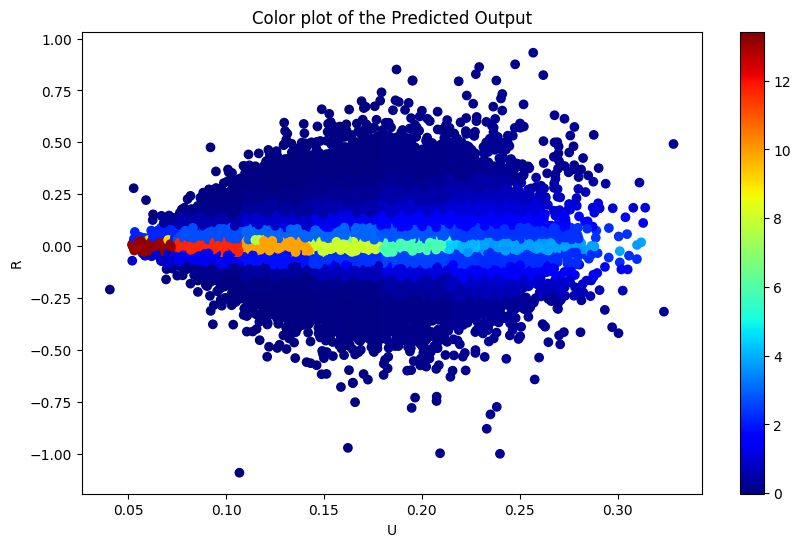

In [31]:
# Make a color plot of the predictions with U_test and R_test as the axes
plt.figure(figsize=(10, 6))
# plt.scatter(U_test, R_test, c=np.log(predictions.reshape(-1)), cmap='jet')
plt.scatter(U_test, R_test, c=predictions.reshape(-1), cmap='jet')
plt.xlabel('U')
plt.ylabel('R')
plt.title('Color plot of the Predicted Output')
plt.colorbar()
plt.show()


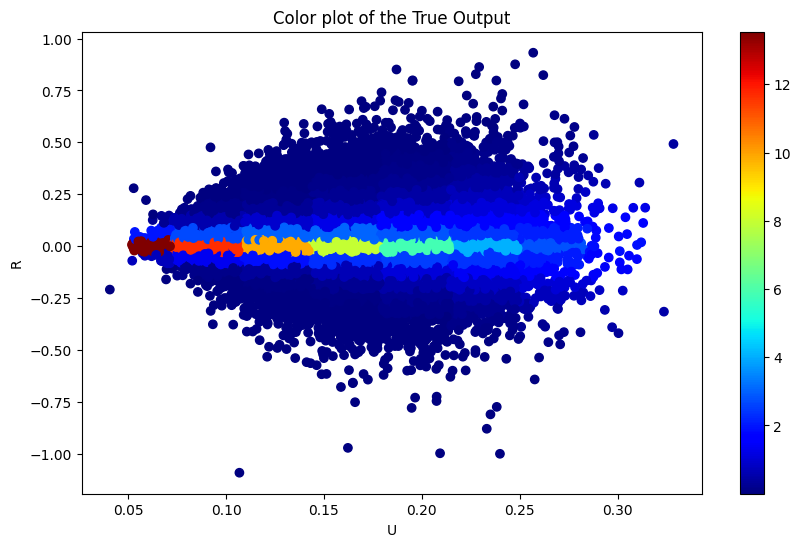

In [32]:
# Make a color plot of the output_test with U_test and R_test as the axes
plt.figure(figsize=(10, 6))
# plt.scatter(U_test, R_test, c=np.log(output_test), cmap='jet')
plt.scatter(U_test, R_test, c=output_test, cmap='jet')
plt.xlabel('U')
plt.ylabel('R')
plt.title('Color plot of the True Output')
plt.colorbar()
plt.show()

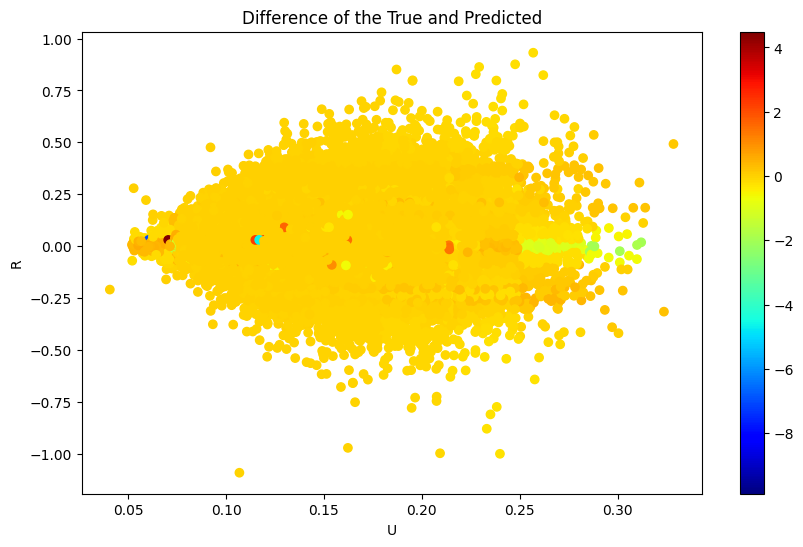

In [33]:
# Make a color plot of the output_test with U_test and R_test as the axes
plt.figure(figsize=(10, 6))
plt.scatter(U_test, R_test, c=output_test-predictions.reshape(-1), cmap='jet')
plt.xlabel('U')
plt.ylabel('R')
plt.title('Difference of the True and Predicted')
plt.colorbar()
plt.show()

In [90]:
U_grid = np.linspace(U_test.min(), U_test.max(), 100)
R_grid = np.linspace(R_test.min(), R_test.max(), 100)

U_grid_mesh, R_grid_mesh = np.meshgrid(U_grid, R_grid)

# Make a data frame of the U_grid_mesh and R_grid_mesh
y_mesh = pd.DataFrame(U_grid_mesh.reshape(-1), columns=['U'])
y_mesh['R'] = R_grid_mesh.reshape(-1)

In [91]:
mesh_predictions = model.predict(y_mesh)

313/313 [==============================] - 0s 609us/step


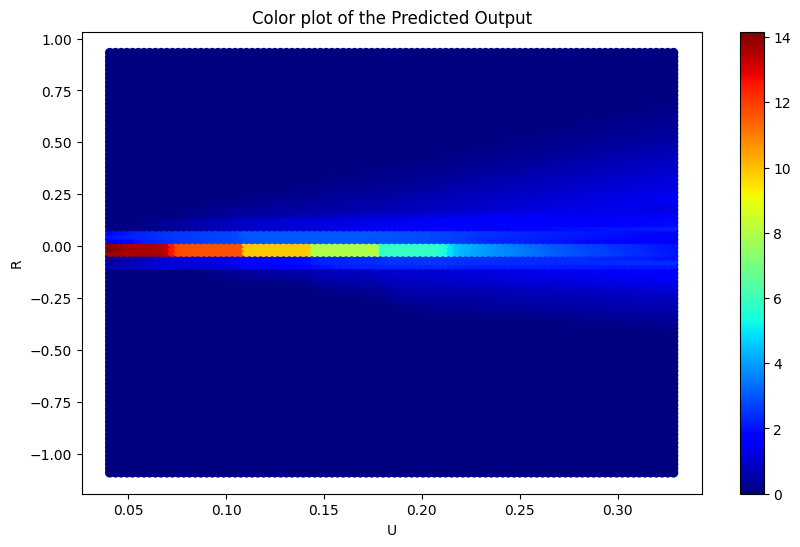

In [92]:
# Make a color plot of the predictions with U_test and R_test as the axes
plt.figure(figsize=(10, 6))
plt.scatter(U_grid_mesh.reshape(-1), R_grid_mesh.reshape(-1), c=mesh_predictions.reshape(-1), cmap='jet')
plt.xlabel('U')
plt.ylabel('R')
plt.title('Color plot of the Predicted Output')
plt.colorbar()
plt.show()


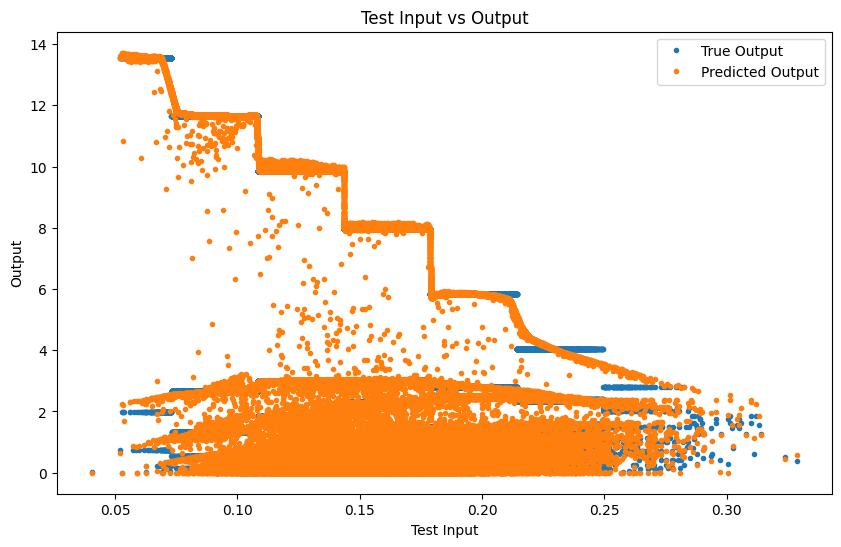

In [93]:
plt.figure(figsize=(10, 6))
#Plot the true output and the predicted output
plt.plot(pd.DataFrame(X_test).iloc[:,0], pd.DataFrame(y_test).iloc[:,0],'.', label='True Output')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions,'.', label='Predicted Output')
# plt.plot(x_test_2d[:,0], y_test_2d,'.', label='True Output')
# plt.plot(x_test_2d[:,0], predictions,'.', label='Predicted Output')

plt.xlabel('Test Input')
plt.ylabel('Output')
plt.title('Test Input vs Output')
plt.legend()
plt.show()


In [267]:
import seaborn as sns

# Plot the scatter plot with a regression line
sns.regplot(x=pd.DataFrame(X_test).iloc[:,0], y=predictions, scatter_kws={"color": "blue", 's': 10}, line_kws={"color": "red"}, order=1)

plt.show()

ModuleNotFoundError: No module named 'seaborn'

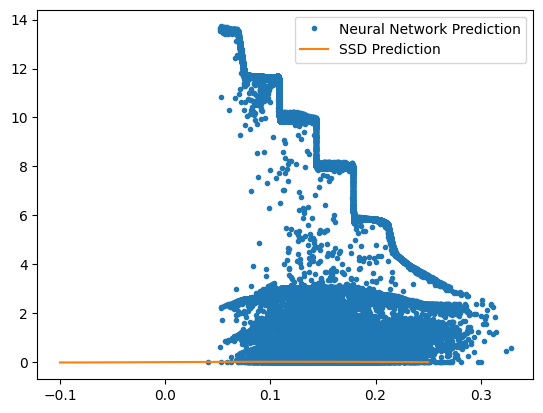

In [94]:
with open("./variables.pickle", "rb") as f:
    R_space, U_space = pickle.load(f)
    
# plt.plot(test_input[sorted_indices], predictions[sorted_indices], label='Neural Network Prediction')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions,'.', label='Neural Network Prediction')
plt.plot(U_space, R_space, label='SSD Prediction')
#plt.ylim(0, 0.02)
plt.legend()
plt.show()